# Pymaceuticals Inc.
---

### Analysis
##### Analysis can go here or at the bottom of the file.  I usually put it at the end.
1.  
2.
3. 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
master_df = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
master_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Checking the number of mice.
master_df['Mouse ID'].nunique()

249

In [25]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# clean_df = master_df.drop_duplicates(subset=['Mouse ID'])
# clean_df.head()
duplicate_mice_IDs = master_df.loc[master_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice_IDs

array(['g989'], dtype=object)

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_df = master_df.set_index('Mouse ID')
duplicate_mice_df.loc['g989']

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [27]:
clean_df = duplicate_mice_df.drop(['g989'])
clean_df.shape
clean_df.count()

Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
# There are multiple ways of doing this and it is good to search online to see the suggestions.
clean = clean_df.reset_index()
clean['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

In [29]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()
clean_mice_df = clean.loc[master_df['Mouse ID']=='g989', :]
clean_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,h246,Ketapril,Male,13,30,0,45.000000,0
909,h246,Ketapril,Male,13,30,5,49.470417,0
910,h246,Ketapril,Male,13,30,10,51.368862,1
911,h246,Ketapril,Male,13,30,15,56.184327,1
912,h246,Ketapril,Male,13,30,20,57.935912,1
913,h246,Ketapril,Male,13,30,25,59.548854,1
914,h246,Ketapril,Male,13,30,30,63.599610,1
915,h246,Ketapril,Male,13,30,35,67.211270,2
916,h246,Ketapril,Male,13,30,40,71.150835,2
917,h246,Ketapril,Male,13,30,45,74.104086,2


## Summary Statistics

In [30]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and 
# summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).mean()
median = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).median()
variance = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).var()
std = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).std()
sem = clean['Tumor Volume (mm3)'].groupby(clean['Drug Regimen']).sem()



summary_statistics = pd.DataFrame({'Mean Tumor Volume':mean,
                                   'Median Tumor Volume':median,
                                   'Tumor Volume Variance':variance,
                                   ' Standard Deviation of Tumor Volume':std,
                                   'SEM of Tumor Volume':sem,
                                  })

summary_statistics




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line



## Bar and Pie Charts

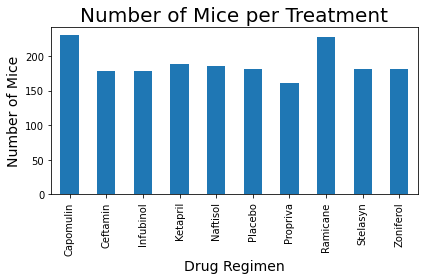

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [32]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


mice_drug_regimen = master_df.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = mice_drug_regimen.plot.bar()
mice_drug_regimen
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Mice",fontsize = 14)
plt.title("Number of Mice per Treatment",fontsize = 20)

plt.tight_layout()
plt.show()

mice_drug_regimen

In [33]:
clean_df.tail()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
z969,Naftisol,Male,9,30,25,63.145652,2
z969,Naftisol,Male,9,30,30,65.841013,3
z969,Naftisol,Male,9,30,35,69.176246,4
z969,Naftisol,Male,9,30,40,70.314904,4
z969,Naftisol,Male,9,30,45,73.867845,4


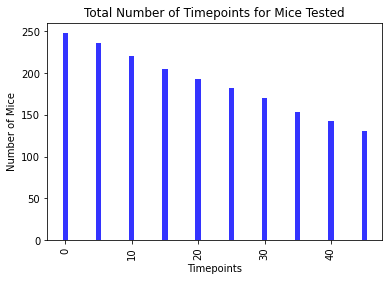

In [34]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_timepoint = clean["Timepoint"].value_counts()
mice_timepoint

x_axis = mice_timepoint.index.values
y_axis = mice_timepoint.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.title("Total Number of Timepoints for Mice Tested")
plt.xlabel("Timepoints")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

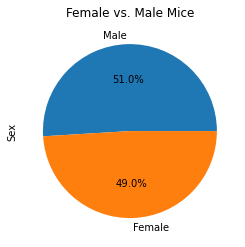

In [35]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than:  of all the mice, what percent were male and female?

gender_df = clean["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_df.plot.pie(autopct= "%1.1f%%")
plt.show()

In [36]:
#Values for both Male and Female
gender_sum = gender_df['Male'] + gender_df['Female']
gender_sum
gender_male = gender_df['Male'] / gender_sum
gender_male
gender_female = gender_df['Female'] / gender_sum
gender_female

0.49042553191489363

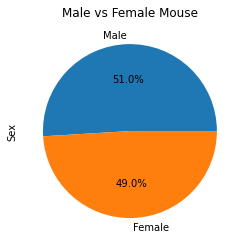

In [37]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.
labels = ['Female', 'Male']
sizes = [gender_female, gender_male]
plot = gender_df.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [39]:
mouse_timepoint = clean.groupby(['Mouse ID'])['Timepoint'].max()
mouse_timepoint_df = pd.DataFrame(mouse_timepoint)

mouse_merge = pd.merge(clean, mouse_timepoint_df, on=('Mouse ID', 'Timepoint'), how = 'right')

treatments = ['Ceftamin','Ramicane','Capomulin','Infubinol']

Ceftamin_Tumor = []
Ramicane_Tumor = []
Capomulin_Tumor = []
Infubinol_Tumor = []

treatments_2 = ['Ceftamin_Tumor','Ramicane_Tumor','Capomulin_Tumor','Infubinol_Tumor']

for index, row in mouse_merge.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        Capomulin_Tumor.append(row['Tumor Volume (mm3)'])
        
    elif row["Drug Regimen"] == 'Ramicane':
        Ramicane_Tumor.append(row['Tumor Volume (mm3)'])
        
    elif row["Drug Regimen"] == 'Infubinol':
        Infubinol_Tumor.append(row['Tumor Volume (mm3)'])
        
    elif row["Drug Regimen"] == 'Ceftamin':
        Ceftamin_Tumor.append(row['Tumor Volume (mm3)'])

df_Ceftamin = mouse_merge.loc[mouse_merge['Drug Regimen']=='Ceftamin', 'Tumor Volume (mm3)']


df_Ramicane = mouse_merge.loc[mouse_merge['Drug Regimen']=='Ramicane', 'Tumor Volume (mm3)']


df_Capomulin = mouse_merge.loc[mouse_merge['Drug Regimen']=='Capomulin', 'Tumor Volume (mm3)']


df_Infubinol = mouse_merge.loc[mouse_merge['Drug Regimen']=='Infubinol', 'Tumor Volume (mm3)']



In [40]:
Ceftamin_Tumor

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.7846818,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [41]:
ceftamin_quartiles = df_Ceftamin.quantile([.25, .50, .75])
ceftamin_lower = ceftamin_quartiles[0.25]
ceftamin_upper = ceftamin_quartiles[0.75]

iqr_ceftamin = ceftamin_upper-ceftamin_lower
lower_ceftamin = ceftamin_lower - (1.5*iqr_ceftamin)
upper_ceftamin = ceftamin_upper + (1.5*iqr_ceftamin)

ceftamin_outliers = [x for x in df_Ceftamin if x < lower_ceftamin or x > upper_ceftamin]
print(f"Ceftamin's potential outliers: {ceftamin_outliers}")

Ceftamin's potential outliers: []


In [42]:
# Creates quartiles 
capomulin_quartiles = df_Capomulin.quantile([.25, .50, .75])
capomulin_lower = capomulin_quartiles[0.25]
capomulin_upper = capomulin_quartiles[0.75]

# Determines the IQR 
iqr_capomulin = capomulin_upper-capomulin_lower
lower_capomulin = capomulin_lower - (1.5*iqr_capomulin)
upper_capomulin = capomulin_upper + (1.5*iqr_capomulin)

# Calculates any potential outliers 
capomulin_outliers = [x for x in df_Capomulin if x < lower_capomulin or x > upper_capomulin]
print(f"Capomulin's potential outliers: {capomulin_outliers}")
#------------------
# Creates quartiles 
ramicane_quartiles = df_Ramicane.quantile([.25, .50, .75])
ramicane_lower = ramicane_quartiles[0.25]
ramicane_upper = ramicane_quartiles[0.75]

# Determines the IQR 
iqr_ramicane = ramicane_upper-ramicane_lower
lower_ramicane = ramicane_lower - (1.5*iqr_ramicane)
upper_ramicane = ramicane_upper + (1.5*iqr_ramicane)

# Calculates any potential outliers 
ramicane_outliers = [x for x in df_Ramicane if x < lower_ramicane or x > upper_ramicane]
print(f"Ramicane's potential outliers: {ramicane_outliers}")
#------------------
# Creates quartiles 
ceftamin_quartiles = df_Ceftamin.quantile([.25, .50, .75])
ceftamin_lower = ceftamin_quartiles[0.25]
ceftamin_upper = ceftamin_quartiles[0.75]

# Determines the IQR 
iqr_ceftamin = ceftamin_upper-ceftamin_lower
lower_ceftamin = ceftamin_lower - (1.5*iqr_ceftamin)
upper_ceftamin = ceftamin_upper + (1.5*iqr_ceftamin)

# Calculates any potential outliers 
ceftamin_outliers = [x for x in df_Ceftamin if x < lower_ceftamin or x > upper_ceftamin]
print(f"Ceftamin's potential outliers: {ceftamin_outliers}")
#------------------
# Creates quartiles
infubinol_quartiles = df_Infubinol.quantile([.25, .50, .75])
infubinol_lower = infubinol_quartiles[0.25]
infubinol_upper = infubinol_quartiles[0.75]

# Determines the IQR 
iqr_ifubinol = infubinol_upper-infubinol_lower
lower_ifubinol = infubinol_lower - (1.5*iqr_ifubinol)
upper_ifubinol = infubinol_upper + (1.5*iqr_ifubinol)

# Calculates any potential outliers 
infubinol_outliers = [x for x in df_Infubinol if x < lower_ifubinol or x > upper_ifubinol]
print(f"Infubinol's potential outliers: {infubinol_outliers}")


Capomulin's potential outliers: []
Ramicane's potential outliers: []
Ceftamin's potential outliers: []
Infubinol's potential outliers: [36.3213458]


In [44]:
x_value = df_Capomulin
x_value

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb213080ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb213094160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb213070760>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb213094640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb213094910>],
 'means': []}

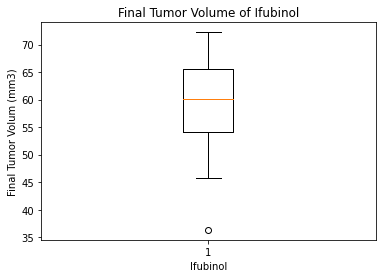

In [45]:
# ax1 = plt.boxplot()
treatments_2 = ['Ceftamin_Tumor','Ramicane_Tumor','Capomulin_Tumor','Infubinol_Tumor']

treatment_drug = ['df_Ceftamin', 'df_Infubinol', 'df_Ramicane', 'df_Capomulin']
x1 = df_Ceftamin
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Ifubinol")
ax1.set_xlabel("Ifubinol")
ax1.set_ylabel("Final Tumor Volum (mm3)")
# , labels=treatments
# ax1.boxplot(treatments_2, labels = treatment_drug)
ax1.boxplot(df_Infubinol)



{'whiskers': [<matplotlib.lines.Line2D at 0x7fb21314ef10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb21315e4f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb21314ed60>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb21315ea90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb21315ed60>],
 'means': []}

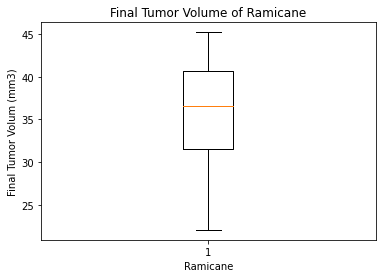

In [46]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Ramicane")
ax1.set_xlabel("Ramicane")
ax1.set_ylabel("Final Tumor Volum (mm3)")
ax1.boxplot(df_Ramicane)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb213255700>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb213255ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb213255430>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb213264280>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb213264550>],
 'means': []}

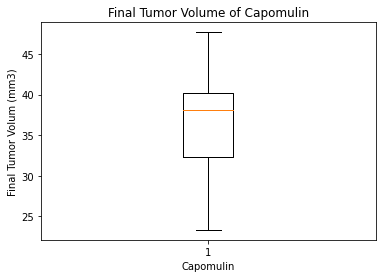

In [47]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Capomulin")
ax1.set_xlabel("Capomulin")
ax1.set_ylabel("Final Tumor Volum (mm3)")
ax1.boxplot(df_Capomulin)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb213350af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb213350fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb213350940>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb213360580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb213360850>],
 'means': []}

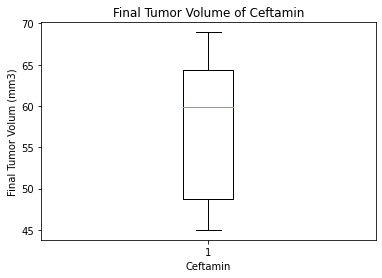

In [48]:
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of Ceftamin")
ax1.set_xlabel("Ceftamin")
ax1.set_ylabel("Final Tumor Volum (mm3)")
ax1.boxplot(df_Ceftamin)

## Line and Scatter Plots

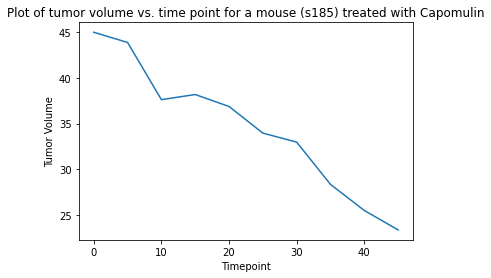

In [55]:
# # Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_mouse = master_df.loc[master_df["Mouse ID"] == "s185",:]

x = Capomulin_mouse['Timepoint']
y = Capomulin_mouse['Tumor Volume (mm3)']
plt.title('Plot of tumor volume vs. time point for a mouse (s185) treated with Capomulin')
plt.plot(x,y)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.show()

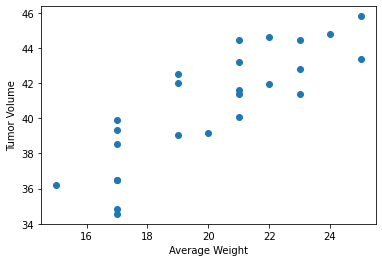

In [63]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen
# The chart below shows a dot for each mouse treated with Capomulin using average weight and average tumor Volume.
#  I would make the X-label say something like "Average Weight (g)"

scat_df = clean.loc[clean['Drug Regimen']=='Capomulin']
x = scat_df.groupby(['Mouse ID'])
scat_avg = x.mean()
x_scatter = scat_avg['Weight (g)']
y_scatter = scat_avg['Tumor Volume (mm3)']
plt.scatter(x_scatter,y_scatter)
plt.xlabel('Average Weight')
plt.ylabel('Tumor Volume')
plt.show()


## Correlation and Regression

Correlation is 0.84


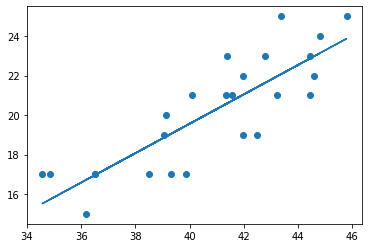

In [71]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

r = round(st.pearsonr(x_scatter,y_scatter)[0],2)
print(f'Correlation is {r}')

correlation = st.pearsonr(y_scatter, x_scatter)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(y_scatter, x_scatter)
regress_values = y_scatter *slope + intercept

plt.scatter(y_scatter, x_scatter)
plt.plot(y_scatter, regress_values)








